In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('breast-cancer.xls')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


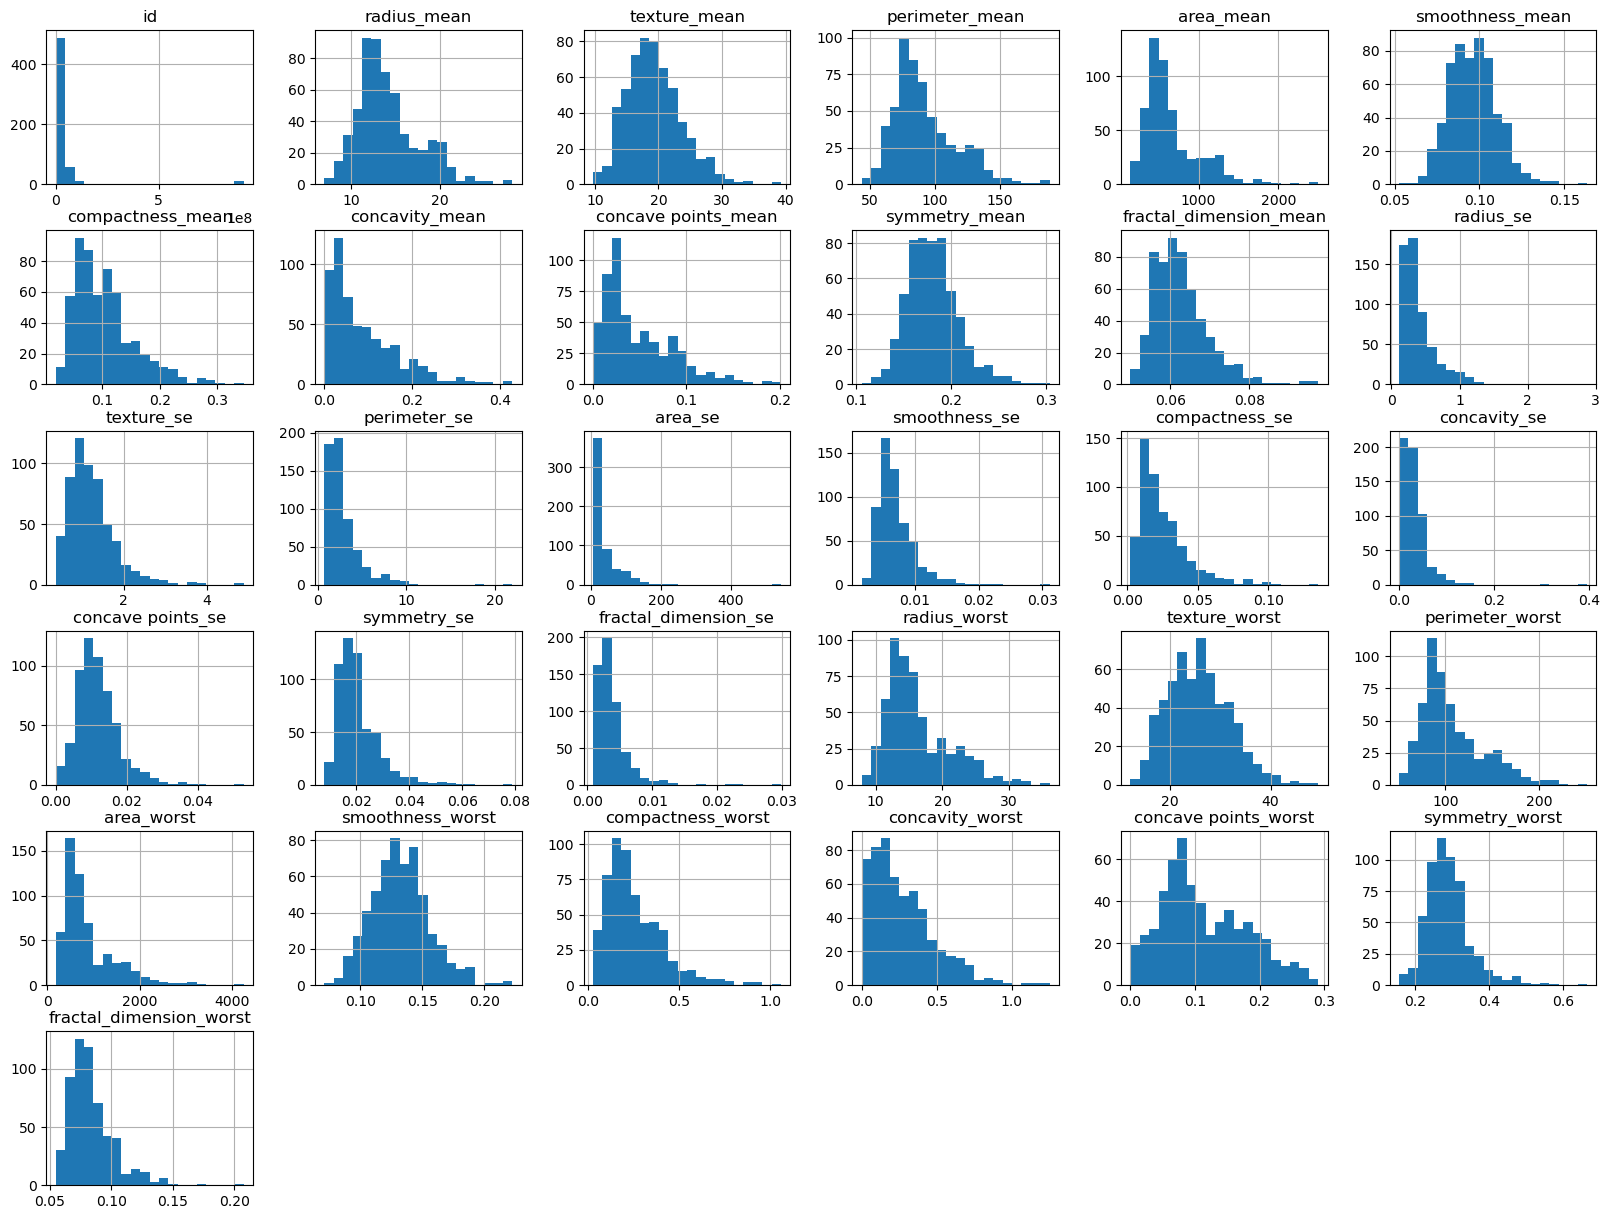

In [5]:
data.hist(figsize=(20, 15), bins=20);

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
sets_list = [data, train_set, test_set]
for frame in sets_list:
    print(frame['diagnosis'].value_counts() / len(frame['diagnosis']))

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64
B    0.628571
M    0.371429
Name: diagnosis, dtype: float64
B    0.622807
M    0.377193
Name: diagnosis, dtype: float64


In [9]:
train_set.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
train_set.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,873593,M,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,859196,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,88466802,B,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


<Axes: xlabel='radius_mean', ylabel='area_mean'>

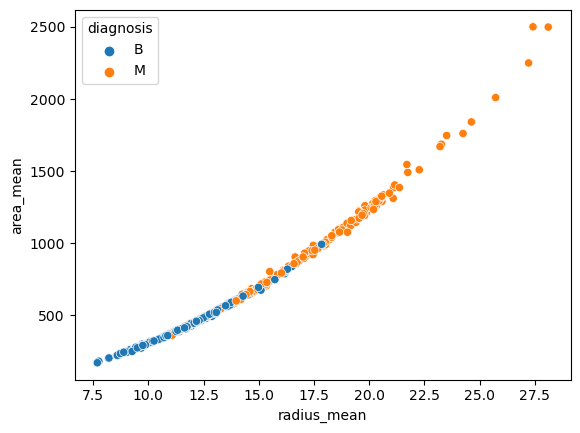

In [11]:
sns.scatterplot(x = 'radius_mean', y = 'area_mean', hue='diagnosis',data=train_set)

<Axes: xlabel='radius_mean', ylabel='symmetry_mean'>

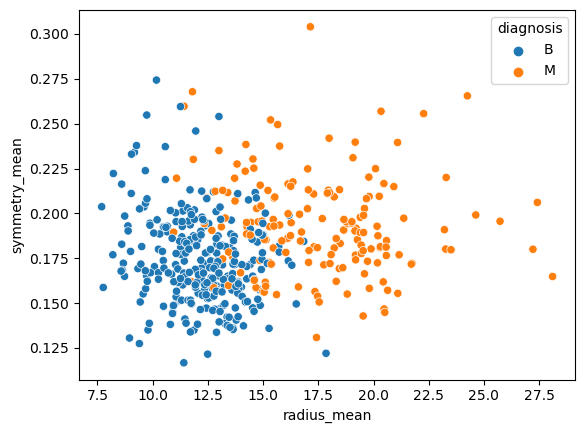

In [12]:
sns.scatterplot(x = 'radius_mean', y = 'symmetry_mean', hue='diagnosis',data=train_set)

<Axes: xlabel='diagnosis', ylabel='area_mean'>

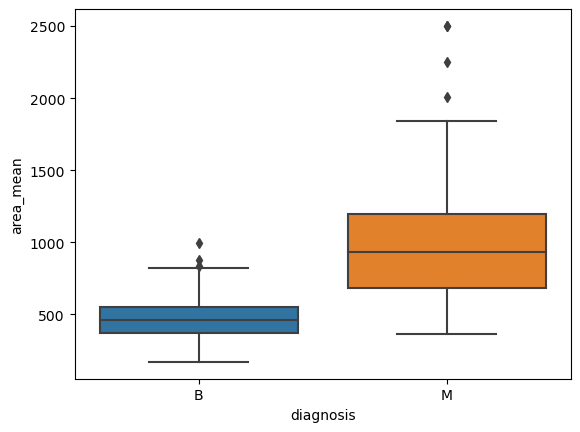

In [13]:
sns.boxplot(x='diagnosis', y='area_mean', data=train_set)

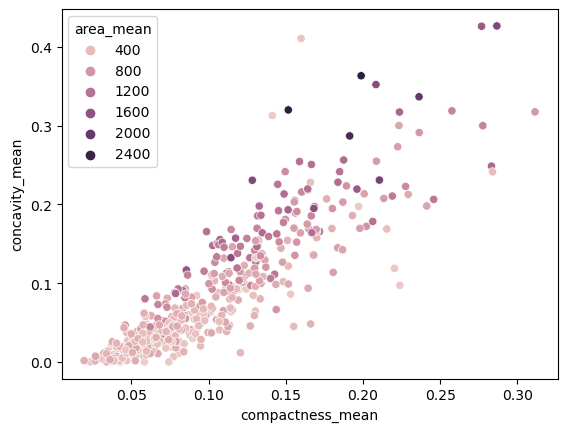

In [14]:
sns.scatterplot(x='compactness_mean', y='concavity_mean', hue='area_mean',data=train_set);

In [15]:
data_corr = data.corr()
data_corr['radius_mean'].sort_values(ascending=False)

/tmp/ipykernel_611/832843096.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


radius_mean                1.000000
perimeter_mean             0.997855
area_mean                  0.987357
radius_worst               0.969539
perimeter_worst            0.965137
area_worst                 0.941082
concave points_mean        0.822529
concave points_worst       0.744214
area_se                    0.735864
radius_se                  0.679090
concavity_mean             0.676764
perimeter_se               0.674172
concavity_worst            0.526911
compactness_mean           0.506124
compactness_worst          0.413463
concave points_se          0.376169
texture_mean               0.323782
texture_worst              0.297008
compactness_se             0.206000
concavity_se               0.194204
smoothness_mean            0.170581
symmetry_worst             0.163953
symmetry_mean              0.147741
smoothness_worst           0.119616
id                         0.074626
fractal_dimension_worst    0.007066
fractal_dimension_se      -0.042641
texture_se                -0

<Axes: >

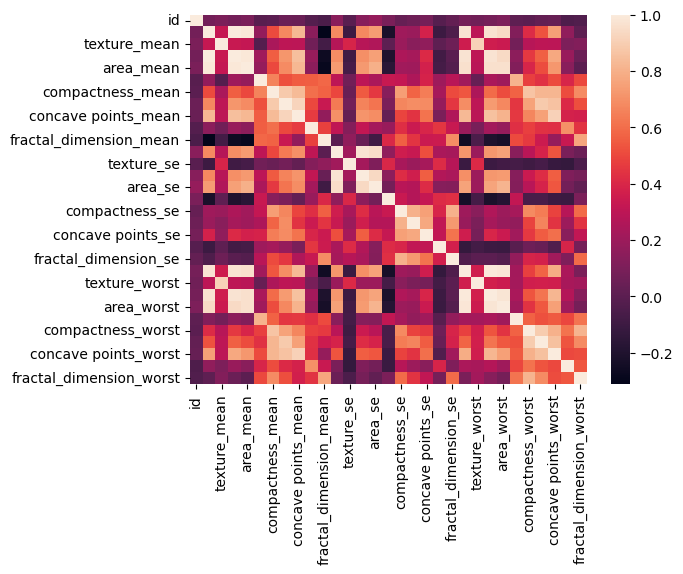

In [16]:
sns.heatmap(data_corr)

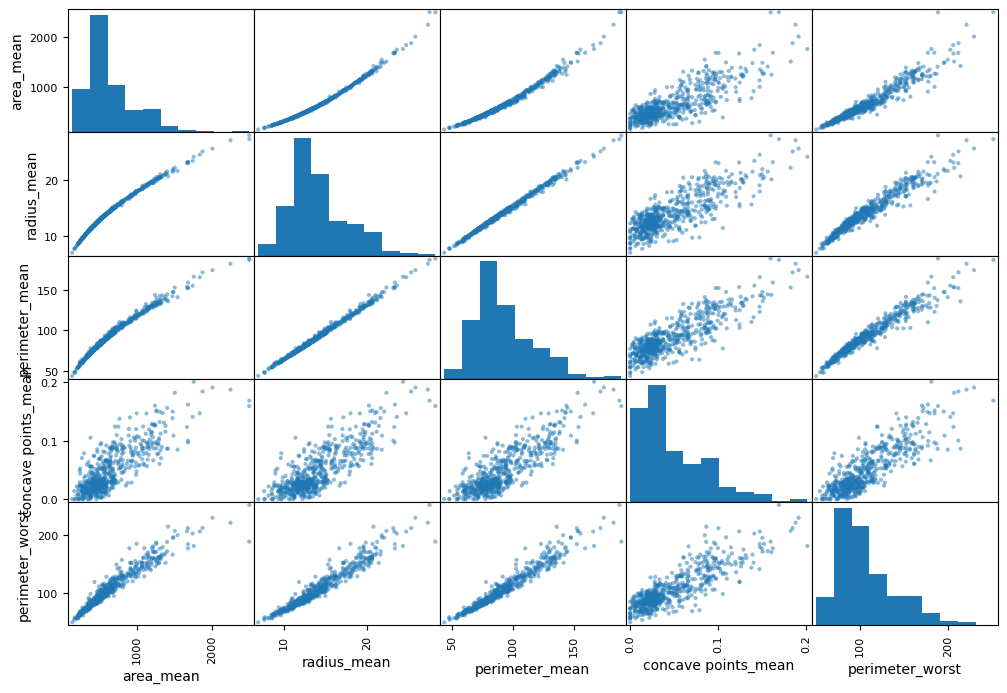

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['area_mean', 'radius_mean', 'perimeter_mean', 'concave points_mean', 'perimeter_worst']
scatter_matrix(data[attributes], figsize=(12, 8));

In [18]:
X = train_set.drop('diagnosis', axis=1)
y = train_set['diagnosis']

In [19]:
X.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.23712699, -1.44075296, -0.43531947, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [-0.23702031,  1.97409619,  1.73302577, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-0.23712907, -1.39998202, -1.24962228, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [-0.17630431,  0.04880192, -0.55500086, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.23675669, -0.03896885,  0.10207345, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.2371006 , -0.54860557,  0.31327591, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [22]:
X_test = test_set.drop('diagnosis', axis=1)
y_test = test_set['diagnosis']

In [23]:
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)
log_reg.score(X_test_scaled, y_test)

0.9736842105263158

In [26]:
from sklearn.svm import LinearSVC

In [27]:
linear_svc = LinearSVC()
linear_svc.fit(X_scaled, y)
linear_svc.score(X_test_scaled, y_test)

0.956140350877193

In [28]:
from sklearn.svm import SVC

In [29]:
svc = SVC()
svc.fit(X_scaled, y)
svc.score(X_test_scaled, y_test)

0.9824561403508771

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_scaled, y)
tree_clf.score(X_test_scaled, y_test)

0.9385964912280702

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_scaled, y)
forest_clf.score(X_test_scaled, y_test)

0.9649122807017544

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb_clf = GaussianNB()
nb_clf.fit(X_scaled, y)
nb_clf.score(X_test_scaled, y_test)

0.9649122807017544

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_scaled, y)
knn.score(X_test_scaled, y_test)

0.9473684210526315

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
scores = cross_val_score(svc, X_scaled, y, cv=10, scoring='accuracy')

In [42]:
log_reg = LogisticRegression()
linear_svc = LinearSVC()
svc = SVC()
tree_clf = DecisionTreeClassifier()
forest_clf = RandomForestClassifier()
nb_clf = GaussianNB()
knn = KNeighborsClassifier()

In [43]:
models = [log_reg, linear_svc, svc, tree_clf, forest_clf, nb_clf, knn]

In [44]:
for model in models:
    print("Model name: ", model)
    scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')
    print("Mean {:.3f}".format(scores.mean()))
    print("Standard deviation {:.3f}".format(scores.std()))


Model name:  LogisticRegression()
Mean 0.974
Standard deviation 0.019
Model name:  LinearSVC()
Mean 0.969
Standard deviation 0.022
Model name:  SVC()
Mean 0.971
Standard deviation 0.030
Model name:  DecisionTreeClassifier()
Mean 0.934
Standard deviation 0.044
Model name:  RandomForestClassifier()
Mean 0.967
Standard deviation 0.025
Model name:  GaussianNB()
Mean 0.925
Standard deviation 0.039
Model name:  KNeighborsClassifier()
Mean 0.967
Standard deviation 0.033


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [46]:
params = [
    {'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
     'penalty' : ['l2', 'l1', 'elasticnet'],
     'solver' : ['lbfgs', 'liblinear', 'newton-cg' 'newton-cholesky', 'sag', 'saga']}
]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid=params, cv=10, scoring='accuracy', return_train_score=True, verbose=True)
grid_search.fit(X_scaled, y)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/szymon/minicon

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                          'penalty': ['l2', 'l1', 'elasticnet'],
                          'solver': ['lbfgs', 'liblinear',
                                     'newton-cgnewton-cholesky', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='accuracy', verbose=True)

In [47]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

LogisticRegression(C=0.1, solver='liblinear')
0.9780193236714976
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [48]:
params = [
    {"C" : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
     'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
     'gamma' : ['scale', 'auto'],
     'max_iter' : [1, 3, 5, 10, 15, 20]}
]

svc = SVC()
grid_search = GridSearchCV(svc, param_grid=params, cv=5, scoring='accuracy', return_train_score=True, verbose=True)
grid_search.fit(X_scaled, y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/skl

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'max_iter': [1, 3, 5, 10, 15, 20]}],
             return_train_score=True, scoring='accuracy', verbose=True)

In [49]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

SVC(C=0.9, max_iter=20)
0.9692307692307693
{'C': 0.9, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 20}


In [57]:
params = [
    {'C' : np.linspace(0.01, 0.2, 10000),
     'penalty' : ['l2', 'l1', 'elasticnet'],
     'solver' : ['lbfgs', 'liblinear', 'newton-cg' 'newton-cholesky', 'sag', 'saga']
}]
log_reg = LogisticRegression()
random_search = RandomizedSearchCV(log_reg, param_distributions=params, cv=5, scoring='accuracy', return_train_score=True, verbose=True)
random_search.fit(X_scaled, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these para

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': array([0.01    , 0.010019, 0.010038, ..., 0.199962, 0.199981, 0.2     ]),
                                         'penalty': ['l2', 'l1', 'elasticnet'],
                                         'solver': ['lbfgs', 'liblinear',
                                                    'newton-cgnewton-cholesky',
                                                    'sag', 'saga']}],
                   return_train_score=True, scoring='accuracy', verbose=True)

In [58]:
print(random_search.best_estimator_)
print(random_search.best_score_)
print(random_search.best_params_)

LogisticRegression(C=0.08072507250725072, solver='saga')
0.9736263736263737
{'solver': 'saga', 'penalty': 'l2', 'C': 0.08072507250725072}


In [63]:
params = [
    {"C" : np.linspace(0.5, 1.5, 10000),
     'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
     'gamma' : ['scale', 'auto'],
     'max_iter' : np.arange(1, 100)}
]

svc = SVC()
random_search = RandomizedSearchCV(svc, param_distributions=params, cv=5, scoring='accuracy', return_train_score=True, verbose=True)
random_search.fit(X_scaled, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=71).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=71).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=71).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=71).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/szymon/miniconda3/envs/ML/lib/python3.11/site-packages

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions=[{'C': array([0.5       , 0.50010001, 0.50020002, ..., 1.49979998, 1.49989999,
       1.5       ]),
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['linear', 'poly', 'rbf',
                                                    'sigmoid'],
                                         'max_iter': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
                   return_train_score=True, scoring='accuracy', verbose=True)

In [64]:
print(random_search.best_estimator_)
print(random_search.best_score_)
print(random_search.best_params_)

SVC(C=1.1500650065006501, max_iter=48)
0.9802197802197803
{'max_iter': 48, 'kernel': 'rbf', 'gamma': 'scale', 'C': 1.1500650065006501}


In [65]:
final_model = random_search.best_estimator_

In [66]:
final_model.score(X_test_scaled, y_test)

0.9736842105263158

In [67]:
final_model.predict(X_test_scaled[1,:].reshape(1, -1))

array(['M'], dtype=object)